In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv('AFF_cleaned for machine learning.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
## drop day,month and year
df=df.drop(['day','month','year'],axis=1)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df['Classes'].value_counts()

fire        137
not fire    105
Name: Classes, dtype: int64

In [7]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [8]:
df['Classes'].value_counts()

1    137
0    105
Name: Classes, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  242 non-null    int64  
 1   RH           242 non-null    int64  
 2   Ws           242 non-null    int64  
 3   Rain         242 non-null    float64
 4   FFMC         242 non-null    float64
 5   DMC          242 non-null    float64
 6   DC           242 non-null    float64
 7   ISI          242 non-null    float64
 8   BUI          242 non-null    float64
 9   FWI          242 non-null    float64
 10  Classes      242 non-null    int64  
 11  Region       242 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.8 KB


In [10]:
## independent and dependent feature
x=df.drop('FWI',axis=1)
y=df['FWI']

In [11]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [14]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((181, 11), (61, 11), (181,), (61,))

In [15]:
## feature selection
x_test.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
24,31,64,15,0.0,86.7,14.2,63.8,5.7,18.3,1,0
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,1,0
152,33,48,16,0.0,87.6,7.9,17.8,6.8,7.8,1,1
209,35,53,17,0.5,80.2,20.7,149.2,2.7,30.6,1,1
237,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1


In [16]:
x.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.650794,-0.287372,-0.324513,0.676612,0.484601,0.375001,0.603101,0.458633,0.514975,0.272790
RH,-0.650794,1.000000,0.247453,0.218836,-0.644058,-0.406805,-0.224874,-0.685801,-0.351953,-0.430319,-0.407064
Ws,-0.287372,0.247453,1.000000,0.178715,-0.173368,-0.004294,0.076165,0.004880,0.027971,-0.074460,-0.178133
Rain,-0.324513,0.218836,0.178715,1.000000,-0.539144,-0.284385,-0.294229,-0.343368,-0.295532,-0.374521,-0.047085
FFMC,0.676612,-0.644058,-0.173368,-0.539144,1.000000,0.601559,0.505102,0.738799,0.589872,0.768076,0.230275
DMC,0.484601,-0.406805,-0.004294,-0.284385,0.601559,1.000000,0.875504,0.679172,0.982179,0.583798,0.196900
DC,0.375001,-0.224874,0.076165,-0.294229,0.505102,0.875504,1.000000,0.506877,0.941802,0.509178,-0.075379
ISI,0.603101,-0.685801,0.004880,-0.343368,0.738799,0.679172,0.506877,1.000000,0.642661,0.733978,0.268456
BUI,0.458633,-0.351953,0.027971,-0.295532,0.589872,0.982179,0.941802,0.642661,1.000000,0.584778,0.093816
Classes,0.514975,-0.430319,-0.074460,-0.374521,0.768076,0.583798,0.509178,0.733978,0.584778,1.000000,0.167862


### Predicting FWI (Fire Weather Index)


<AxesSubplot: >

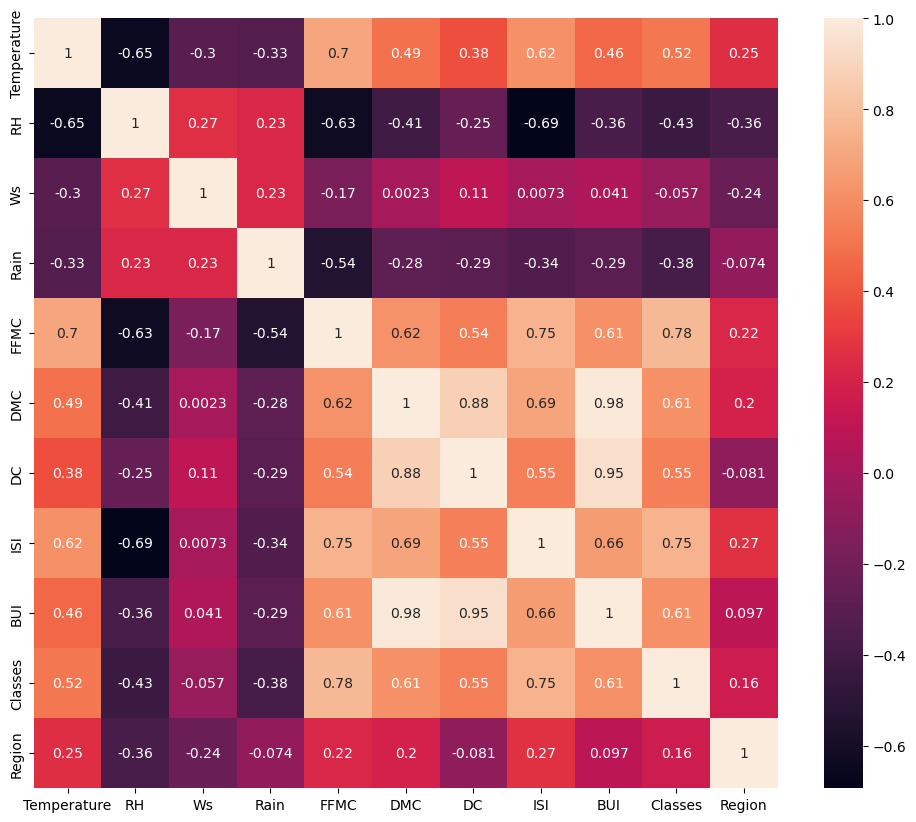

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(x_train.corr(),annot=True)


In [18]:
def correlation(dataset,threshold):
    col_crr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_crr.add(colname)
    return col_crr

In [19]:
corr_features=correlation(x_train,0.85)

In [20]:
corr_features

{'BUI', 'DC'}

In [21]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((181, 9), (61, 9))

## Feature Scaling or Standerdization

In [22]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)

In [23]:
x_train_scaled

array([[-0.83204305,  0.75414469,  1.27336969, ..., -0.60658617,
        -1.07459849, -0.98356052],
       [-0.03098033, -0.52281424, -0.51885359, ...,  0.08124507,
         0.93058013,  1.01671425],
       [-0.83204305, -1.46373135, -2.66952153, ..., -0.46427625,
         0.93058013,  1.01671425],
       ...,
       [-1.90012668,  0.88856142,  0.55648038, ..., -1.05723422,
        -1.07459849, -0.98356052],
       [ 1.03710331, -0.45560588,  0.19803572, ...,  0.84023126,
         0.93058013,  1.01671425],
       [-0.56502214,  0.95576978,  1.990259  , ..., -0.84376935,
        -1.07459849, -0.98356052]])

### Box plot to understand effect of Standerd Scalar

/tmp/ipykernel_77/3945118899.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train after scaling')

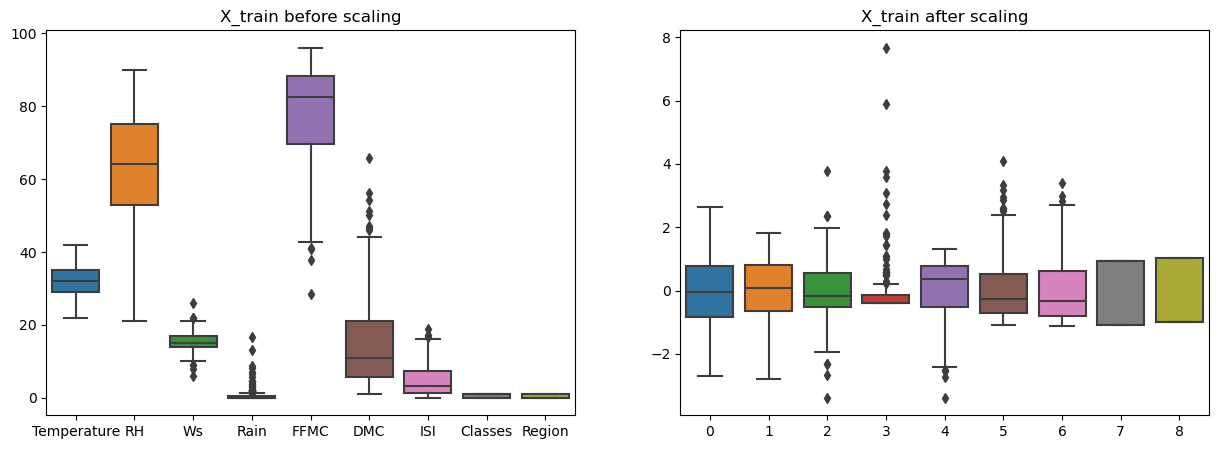

In [24]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title("X_train after scaling")

### Linear Regression Model

Mean Absolite Error is : 0.5842592629828411
R2 Score is : 0.9834788938679516


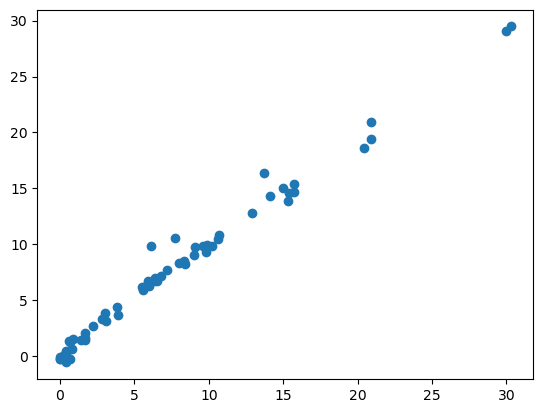

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolite Error is :",mae)
print("R2 Score is :",score)
plt.scatter(y_test,y_pred)

- Here we are getting 0.98 R2 square that means our model is 98% accurate

## Lasso Regression

Mean Absolute error is : 1.1461857066668217
R2 score is : 0.9497598357669019


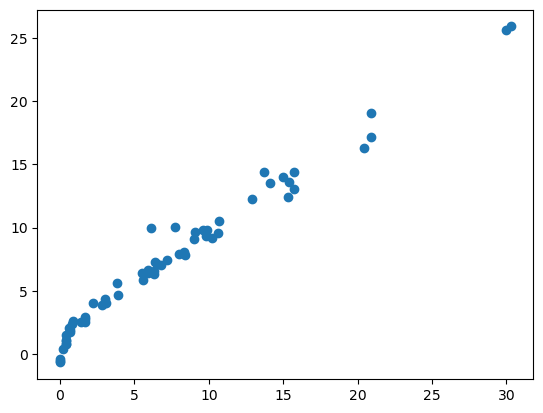

In [26]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute error is :",mae)
print("R2 score is :",score)
plt.scatter(y_test,y_pred)

In [27]:
## coeffincent or slop
lasso.coef_

array([ 0.       , -0.       ,  0.       , -0.       ,  0.       ,
        3.0039702,  3.8664299,  0.       , -0.       ])

In [28]:
## Intercept
lasso.intercept_

6.9176795580110495

## Cross Validation Lasso

In [29]:
from sklearn.linear_model import LassoCV

In [30]:
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

Mean Absolute Error : 0.6705591654022504
R2 score :  0.9808529600140472


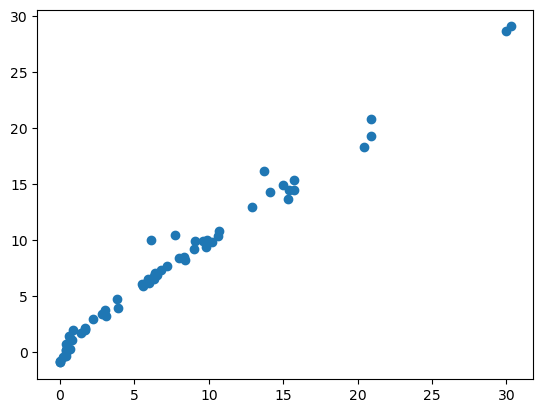

In [31]:
y_pred=lassocv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error :",mae)
print("R2 score : ",score)

## Ridge Regression

Mean Absolute Error is : 0.6130231330299619
R2 score is : 0.9826549946217243


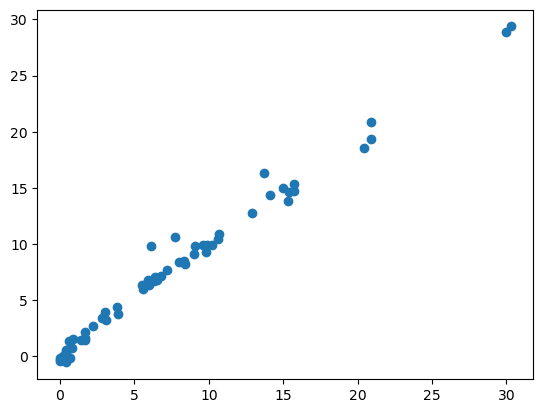

In [32]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error is :",mae)
print("R2 score is :",score)
plt.scatter(y_test,y_pred)

## Cross Validation by Ridge regression

Mean Absolute Error is : 0.8579652474382073
R2 score is : 0.9729536531310912


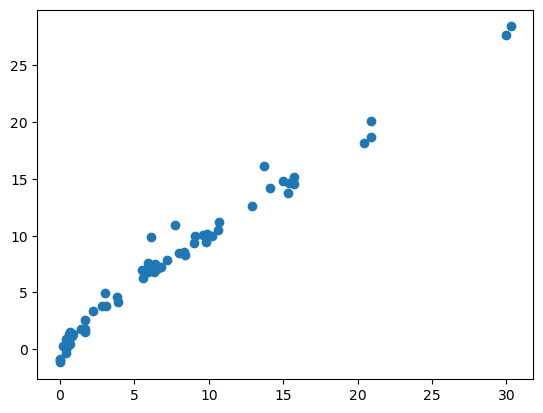

In [36]:
from sklearn.linear_model import RidgeCV
ridgeCV=RidgeCV(cv=7)
ridgeCV.fit(x_train_scaled,y_train)
y_pred=ridgeCV.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error is :",mae)
print("R2 score is :",score)
plt.scatter(y_test,y_pred)

In [38]:
ridgeCV.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 7,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

## ElasticNet Regression

Mean Absolute Error is : 1.8913082043684368
R2 score is : 0.8731662267069684


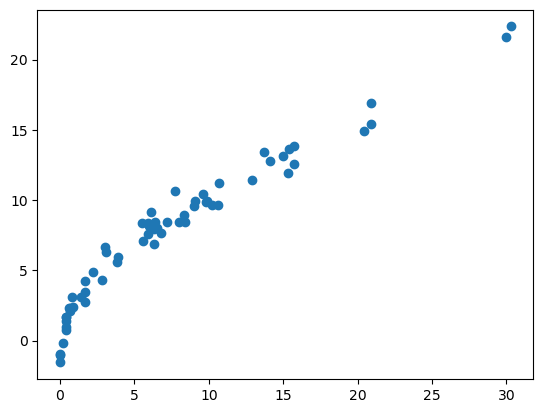

In [39]:
from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet()
elasticnet.fit(x_train_scaled,y_train)
y_pred=elasticnet.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error is :",mae)
print("R2 score is :",score)
plt.scatter(y_test,y_pred)

In [40]:
scalar

StandardScaler()

In [41]:
ridge

Ridge()

In [42]:
import pickle
pickle.dump(scalar,open('scalar.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))